# Numpy

실제 파이썬 기반 데이터 분석을 하다보면 Numpy보다는 Pandas를 많이 사용하게 된다. 하지만 많은 머신러닝 알고리즘이 넘파이 기반으로 작성되있고, 많은 알고리즘이 입출력 데이터로 numpy 배열타입(ndarray)를 이용하고 있어 이를 이해하는 것은 파이썬 기반 머신러닝에 있어 중요하다.

참고자료
* 파이썬 머신러닝 완벽 가이드(권철민): https://github.com/wikibook/ml-definitive-guide
* 파이썬 데이터 사이언스 Cheat Sheet: NumPy 기초, 기본(taewan.kim):  http://taewan.kim/post/numpy_cheat_sheet/#9-%EB%B0%B0%EC%97%B4-%EC%A0%95%EB%A0%AC

* Python tutorial(Justin Johnson): http://cs231n.github.io/python-numpy-tutorial/

To use Numpy, we first need to import the `numpy` package:

In [2]:
import numpy as np
np.__version__

'1.18.5'

## Numpy ndarray

### 생성하기

In [ ]:
# list to ndarray
l = [[0.1,0.2], [0.1,0.2]]
array = np.array(l)
print(array)

# ndarray to list
l2 = array.tolist()
l2

[[0.1 0.2]
 [0.1 0.2]]


[[0.1, 0.2], [0.1, 0.2]]

#### np.zeros, np.ones, np.full, np.eye, np.empty

In [ ]:
a1 = np.zeros((1,2))  # 0으로 초기화. 데이터타입 지정안해주면 float64으로 생성됨
a2 = np.zeros((1,2),dtype=np.int16)  # 0으로 초기화. 데이터타입 지정
b = np.ones((2,2))   # Create an array of all ones

c = np.full((2,2), 7) # 모든 요소를 지정한 "fill_value"로 초기화
d = np.eye(2)        # Create a 2x2 identity matrix
e = np.empty((4,2))  # 요소 초기화 과정이 없이 기존 메모리값을 그대로 사용하여 생성이 가장 빠르지만 값에 주의

print(a1,a2,b,c,d,e, sep="\n\n")

[[0. 0.]]

[[0 0]]

[[1. 1.]
 [1. 1.]]

[[7 7]
 [7 7]]

[[1. 0.]
 [0. 1.]]

[[-1.28822975e-231 -1.28822975e-231]
 [ 1.03753786e-322  0.00000000e+000]
 [ 7.56605238e-307  5.02034658e+175]
 [ 1.32439291e-071  6.22919174e-038]]
float64


#### shape 같은 행렬을 만들기: np.zeros_like, np.ones_like, np.full_like, np.empty_like

In [ ]:
a = np.array([[1,2,3], [4,5,6]])
b = np.ones_like(a)
print(b)

[[1 2 3]
 [4 5 6]]

[[1 1 1]
 [1 1 1]]


#### 난수 기반 배열 생성: np.random.normal / rand / randn / randint / random

In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values


In [ ]:
# seed 값을 설정하여 아래에서 난수가 재연 가능하도록 함
np.random.seed(100)
a1 = np.random.random((2, 2))
a2 = np.random.random((2, 2))
np.random.seed(100)
a3 = np.random.random((2, 2))
print(a1,a2,a3, sep="\n\n")

[[0.54340494 0.27836939]
 [0.42451759 0.84477613]]

[[0.00471886 0.12156912]
 [0.67074908 0.82585276]]

[[0.54340494 0.27836939]
 [0.42451759 0.84477613]]


#### 데이터 생성 함수: numpy.arange, numpy.linspace, numpy.logspace

[0 1 2 3 4 5 6 7 8 9]

[0. 5.]

[ 0.   2.5  5.   7.5 10. ]

[ 1.25892541  1.58489319  1.99526231  2.51188643  3.16227766  3.98107171
  5.01187234  6.30957344  7.94328235 10.        ]


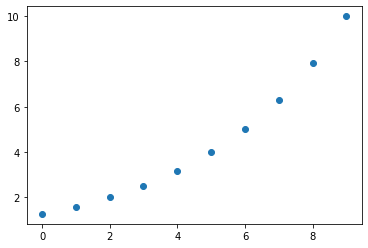

In [ ]:
a1 = np.arange(10) #python range()와 유사
a2 = np.arange(0, 10, 5, np.float)  # 데이터 간격 기준, 균등 배열 생성. stop 미포함
a3 = np.linspace(0, 10, 5)           # 요소 개수 기준, 균등 배열 생성. stop 포함
a4 = np.logspace(0.1, 1, 10, endpoint=True)# 요소 개수 기준, 로그 스케일 배열 생성. stop 포함
print(a1,a2,a3,a4, sep="\n\n")

import matplotlib.pyplot as plt
plt.plot(a4, 'o')
plt.show()

#### 칼럼명 넣어주기?

In [ ]:
dtype = [('name', 'S10'), ('height', float), ('age', int)]
values = [('Arthur', 1.8, 41), ('Lancelot', 1.9, 38),
          ('Galahad', 1.7, 38)]
a = np.array(values, dtype=dtype)
a

array([(b'Arthur', 1.8, 41), (b'Lancelot', 1.9, 38),
       (b'Galahad', 1.7, 38)],
      dtype=[('name', 'S10'), ('height', '<f8'), ('age', '<i8')])

In [ ]:
a['height'] # 이런식으로 접근 가능. df와 유사(df가 아닌 dict과 유사하다고 해야할까?)

array([1.8, 1.9, 1.7])

### Numpy ndarray 개략정보

#### .shape, .ndim, .size

In [5]:
array1 = np.array([1,2,3]) #1차원. (3,)로 표기됨
array2 = np.array([[1,2,3],
                  [2,3,4]])
array3 = np.array([[1,2,3]]) #2차원. (1, 3)로 표기됨

print('array1 type:',type(array1))

print('shape:',array1.shape, array2.shape, array3.shape)
print('ndim: ',array1.ndim, array2.ndim, array3.ndim)  # 차원 수
print('size: ',array1.size, array2.size, array3.size)  # 원소 총 개수

array1 type: <class 'numpy.ndarray'>
shape: (3,) (2, 3) (1, 3)
ndim:  1 2 2
size:  3 6 3


#### 데이터 타입 확인 몇 변환: .dtype, .astype(type)

In [ ]:
#numpy.ndarray는 list와 달리 동일한 데이터 타입만 가질 수 있음. 
# 만약 다른형이 들어가면 데이터 크기가 더 큰 타입으로 형 변환 일괄적용
list3 = [1, 2, 3.0]
array3 = np.array(list3)
print(array3, array3.dtype)

# 형변환하기
array_int = np.array([1, 2, 3])
array_float = array_int.astype('float64') # type을 string으로 넣어줌
print(array_int.dtype, array_float.dtype)

[1. 2. 3.] float64
int64 float64


### 배열 형태 변경: .reshape() / .ravel() / T
앞 데이터 생성함수와 같이 자주 쓰임

In [6]:
a1 = np.arange(10).reshape(2,5) # 만약 넣어준 차원과 원소 개수가 안맞으면 오류발생
a2 = np.arange(10).reshape(2,-1) #-1 넣으면 알아서 해줌. -1은 하나의 차원에만 사용 가능
print(a1,a2, sep="\n\n")

[[0 1 2 3 4]
 [5 6 7 8 9]]

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [9]:
print(a1.shape)
print(a1.ravel())  # 배열을 1차원으로 만들어줌
print(a1.reshape(-1))  # reshape에 -1만 넣어주면 ravel과 동일. 1차원으로 변환해줌
print(a1.reshape(1,-1)) # 이건  2차원이 반환됨. 위와 햇갈리지 않도록 주의

(2, 5)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4 5 6 7 8 9]]


In [10]:
print(a1.T)

[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


### indexing

#### 단일값 접근

#### Slicing
,는 차원을 나누는 기호, :는 각 차원 안에서 선택할 때 slicing

In [ ]:
array2d = np.arange(1, 10).reshape(3,3)
print('array2d:\n',array2d)
print('array2d[0]:\n',array2d[0,1]) # 요소값 하나
print('array2d[0]:\n',array2d[0]) #행 한줄
print('array2d[0:2, 0:2] \n', array2d[0:2, 0:2]) #전체가 아님
print('array2d[1:3, :] \n', array2d[1:3, :])
print('array2d[:, :] \n', array2d[:, :])
print('array2d[:2, 0] \n', array2d[:2, 0:2:2])

array2d:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
array2d[0]:
 2
array2d[0]:
 [1 2 3]
array2d[0:2, 0:2] 
 [[1 2]
 [4 5]]
array2d[1:3, :] 
 [[4 5 6]
 [7 8 9]]
array2d[:, :] 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
array2d[:2, 0] 
 [[1]
 [4]]


#### fancy indexing
리스트나 ndarray로 인덱스. python 기본 리스트에서는 사용불가능

In [ ]:
array2d = np.arange(1, 10).reshape(3,3)
print(array2d)

array3 = array2d[[0,1], 2]  # [[3], [6]]가 아니라 [3, 6]가 출력됨
print('array2d[[0,1], 2] => ',array3.tolist())

array4 = array2d[[0,1,2], 0:2]
print('array2d[[0,1,2], 0:2] => ',array4.tolist())

array5 = array2d[[1,0]] #이렇게 순서를 바꿔 선택할 수 있음
print('array2d[[1,0]] => ',array5.tolist())

[[1 2 3]
 [4 5 6]
 [7 8 9]]
array2d[[0,1], 2] =>  [3, 6]
array2d[[0,1,2], 0:2] =>  [[1, 2], [4, 5], [7, 8]]
array2d[[1,0]] =>  [[4, 5, 6], [1, 2, 3]]


#### Boolean indexing(masking)

In [ ]:
array1d = np.arange(start=1, stop=10)
# [ ] 안에 array1d > 5 Boolean indexing을 적용 
array3 = array1d[array1d < 5]
print(array1d )
print('array1d < 5 : ', array1d < 5)
print('array1d < 5 불린 인덱싱 결과 값 :', array3)

[1 2 3 4 5 6 7 8 9]
array1d < 5 :  [ True  True  True  True False False False False False]
array1d < 5 불린 인덱싱 결과 값 : [1 2 3 4]


In [ ]:
boolean_indexes = np.array([False, False, False, False, False,  True,  True,  True,  True])
array3 = array1d[boolean_indexes]
print('불린 인덱스로 필터링 결과 :', array3)

불린 인덱스로 필터링 결과 : [6 7 8 9]


### 정렬 – sort( )와 argsort( )
참고: Numpy에서 axis 이해 http://taewan.kim/post/numpy_sum_axis/

#### 정렬: np.sort(nda), .sort()

In [ ]:
org_array = np.array([ 3, 1, 9, 5]) 
print('원본 행렬:', org_array)
# np.sort( )로 정렬 
sort_array1 = np.sort(org_array)  #원본 행렬은 두고 정렬된 행렬을 반환
print ('np.sort( ) 호출 후 반환된 정렬 행렬:', sort_array1) 
print('np.sort( ) 호출 후 원본 행렬:', org_array)
# ndarray.sort( )로 정렬
sort_array2 = org_array.sort()    #원본 행렬을 정렬하고 반환하지 않음
print('org_array.sort( ) 호출 후 반환된 행렬:', sort_array2)
print('org_array.sort( ) 호출 후 원본 행렬:', org_array)


원본 행렬: [3 1 9 5]
np.sort( ) 호출 후 반환된 정렬 행렬: [1 3 5 9]
np.sort( ) 호출 후 원본 행렬: [3 1 9 5]
org_array.sort( ) 호출 후 반환된 행렬: None
org_array.sort( ) 호출 후 원본 행렬: [1 3 5 9]


In [ ]:
sort_array1_desc = np.sort(org_array)[::-1] #python Extended Slices 활용. ascending 옵션이 없음
print ('내림차순으로 정렬:', sort_array1_desc) 

내림차순으로 정렬: [9 5 3 1]


In [ ]:
array2d = np.array([[8, 12], 
                   [7, 1 ]])
sort_array2d_axis1 = np.sort(array2d) # axis 기본값 =-1. 즉 마지막 axis를 기준으로 하기에 여기선 axis=1과 동일
print('정렬:\n', sort_array2d_axis1)

sort_array2d_axis0 = np.sort(array2d, axis=0)
print('axis=0:\n', sort_array2d_axis0)

sort_array2d_axis1 = np.sort(array2d, axis=1)
print('axis=1:\n', sort_array2d_axis1)

정렬:
 [[ 8 12]
 [ 1  7]]
axis=0:
 [[ 7  1]
 [ 8 12]]
axis=1:
 [[ 8 12]
 [ 1  7]]


#### 정렬 행렬의 인덱스 반환: np.argsort(), .argsort()

In [ ]:
org_array = np.array([ 3, 1, 9, 5]) 
sort_indices = np.argsort(org_array)
print(type(sort_indices))
print('행렬 정렬 시 원본 행렬의 인덱스:', sort_indices)

<class 'numpy.ndarray'>
행렬 정렬 시 원본 행렬의 인덱스: [1 0 3 2]


In [ ]:
org_array.argsort

In [ ]:
#실제로 이를 활용할때는 다음과 같이  fancy indexing으로 활용
# "칼럼명 넣어주기" 처럼 dtype을 활용하여 칼럼명 유사하게 쓸 수도 있을듯함

name = np.array(['john', 'Mike', 'Sarah'])
score = np.array([44,52,13])
sorted_indices = np.argsort(score)
print(sorted_indices)
print(name[sorted_indices])# 성적 높은순 출력
print(name[sorted_indices][::-1])# 성적 낮은순 출력

[2 0 1]
['Sarah' 'john' 'Mike']
['Mike' 'john' 'Sarah']


### 배열 내 값 비교
#### 배열이 가지고 있는 값이 모두 동일한지 확인

In [ ]:
c = np.arange(1, 10).reshape(3, 3)

In [ ]:
np.array_equal(a, c) # 그냥 a==b 하면 요소마다 비교한 boolean array를 리턴. 아래 참조

True

#### 배열 내 최대(소)값 index 반환: argmax(), argmin()

In [ ]:
c = np.arange(3, 7)
c

array([3, 4, 5, 6])

In [ ]:
c.argmax()

3

#### 가장 frequent한 원소 찾기

In [ ]:
a = [1,2,3,2,1,1,1,2,2,2,2,2]
(values,counts) = np.unique(a,return_counts=True)
print(values)
print(counts)

[1 2 3]
[4 7 1]


In [ ]:
values[np.argmax(counts)]

2

### 배열 연산

In [ ]:
a = np.arange(1, 10).reshape(3, 3)
b = np.arange(9, 0, -1).reshape(3, 3)
print(a,b, sep='\n')

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


#### 배열 간 일반 연산: 같은 위치 요소간

In [ ]:
print(a+b, a*b, sep='\n')

[[10 10 10]
 [10 10 10]
 [10 10 10]]
[[ 9 16 21]
 [24 25 24]
 [21 16  9]]


In [ ]:
print(a==b, a>b, sep='\n')

[[False False False]
 [False  True False]
 [False False False]]
[[False False False]
 [False False  True]
 [ True  True  True]]


#### 브로드캐스팅(Broadcasting)
* 두 배열 간의 Shape이 다를 경우 이를 맞추는 Broadcasting 과정을 거칩
* 매트릭스와 한 차원 작지만 row/column이 동일한 벡터. 벡터간.배열과 Scalar간 연산
* 위 경우가 아니면 오류남

![title](images/broadcast.png) 

In [ ]:
m = np.arange(9).reshape(3, 3)
v1_3 = np.arange(3).reshape(1, 3)
v3_1 = np.arange(3).reshape(3, 1)
print(m,v1_3,v3_1, sep='\n')

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]]
[[0]
 [1]
 [2]]


In [ ]:
print(m+1, m+v1_3,m+v3_1,v1_3+v3_1, sep='\n\n')

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]]

[[0 1 2]
 [1 2 3]
 [2 3 4]]


#### 집계 함수(Aggregate Functions): sum, min, max, cumsum, mean, median, corrcoef, std

In [ ]:
r1 = a.sum()  # np.sum(a)과 동일. 아래도 마찬가지
r2 = a.sum(axis=0)
r3 = a.sum(axis=1)
print(r1,r2,r3, sep='\n')

45
[12 15 18]
[ 6 15 24]


In [ ]:
r1 = a.cumsum()
r2 = a.cumsum(axis=0)
r3 = a.cumsum(axis=1)
print(r1,r2,r3, sep='\n')

[ 1  3  6 10 15 21 28 36 45]
[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


#### 선형대수 연산 – 행렬 내적과 전치 행렬 구하기

##### 행렬 내적: np.dot(A, B)

In [ ]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[7, 8],
              [9, 10],
              [11, 12]])

print('행렬 내적 결과:\n', np.dot(A, B))

행렬 내적 결과:
 [[ 58  64]
 [139 154]]


##### 전치 행렬: np.transpose(A)

In [ ]:
A = np.array([[1, 2],
              [3, 4]])
transpose_mat = np.transpose(A)
print('A의 전치 행렬:\n', transpose_mat)

A의 전치 행렬:
 [[1 3]
 [2 4]]


* 1차 어레이일 때 크기만 존재함. 즉 shape로 확인하면 (n,)처럼 나오지만 (,n)이기도 하다고 봐야함

In [ ]:
# (4,)인 어레이는 T해도 결과가 달라지지 않음
arr_1d = np.array([0,1,2])
arr_1d.shape

(3,)

In [ ]:
arr_1d.transpose().shape

(3,)

In [ ]:
# 반면 2차원 어레이의 경우는 행,열이 존재하고 순서 중요
arr_2d = np.array([[0,1,2]])
arr_2d.shape

(1, 3)

In [ ]:
arr_2d.transpose().shape

(3, 1)

In [ ]:

arr = np.array([[0,1],
               [2,3],
               [4,5]])

# (3,) (3, 2)가 연산되면서도 결과는 ( ,3)과 (3, 2)가 연산되는것 처럼 나옴
print(arr_1d.shape, arr.shape)
np.dot(arr_1d, arr)

(3,) (3, 2)


array([10, 13])

In [ ]:
# 당연히 2차원의 경우에는 지켜줘야 함
print(arr_2d.shape, arr.shape)
np.dot(arr_2d, arr)


(1, 3) (3, 2)


array([[10, 13]])

In [ ]:
print(arr_2d.transpose().shape, arr.shape)
np.dot(arr_2d.transpose(), arr) # 이건 오류남

SyntaxError: invalid syntax (<ipython-input-27-5acfea0385de>, line 2)